### In this task you will need to predict student performance based on different characteristics with K-NN

In [1]:
%pylab inline
%precision 6

Populating the interactive namespace from numpy and matplotlib


'%.6f'

In [2]:
import sklearn
import sklearn as skl
import pandas as pd
from pdb import set_trace as bp

In [3]:
np.set_printoptions(linewidth=140,edgeitems=10)
rcParams['figure.figsize'] = (8.0, 5.0)

In [4]:
# you need to download module common from github.com/Apogentus/common and add it to PythonPath 
# system variable with:
import sys;
sys.path.append('/Users/n.bobrovskaya/Projects/fintech-ml/task2')
from common.classes.Struct import Struct
from common.visualize.colors import COLORS
from common.visualize.distributions import cross_distributions, cross_distributions_classification, cross_distributions_regression

#### Load and prepare data

In [5]:
Z=pd.read_csv('data.csv')

In [6]:
Z.head()

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### Make structure with feature groups

In [7]:
F=Struct()
F.numeric = 'VisitedResources AnnouncementsView Discussion'.split()
F.categorical = 'Gender Nationality PlaceofBirth StageID GradeID SectionID Topic Semester \
                        Relation ParentAnsweringSurvey ParentSchoolSatisfaction StudentAbsenceDays'.split()

#### Random shuffling

In [8]:
random.seed(0)
inds = random.permutation(arange(len(Z)))

Z=Z.loc[inds]

Z.index = arange(len(Z))

In [9]:
Z.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            470, 471, 472, 473, 474, 475, 476, 477, 478, 479],
           dtype='int64', length=480)

In [10]:
len(Z)

480

In [11]:
classes = unique(Z['Class'])
classes

array(['H', 'L', 'M'], dtype=object)

In [12]:
Z['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [13]:
Z[F.numeric] = Z[F.numeric].astype(float)

#### Form array X to consist of only NUMERIC variables and array Y of outputs.

In [14]:
X = Z[F.numeric].values
Y = Z['Class'].values

In [15]:
F.numeric

['VisitedResources', 'AnnouncementsView', 'Discussion']

In [16]:
X.dtype

dtype('float64')

In [17]:
X.shape

(480, 3)

#### Using *cross_distributions_classification* plot all pairwise feature distrubutions of features and Y. 

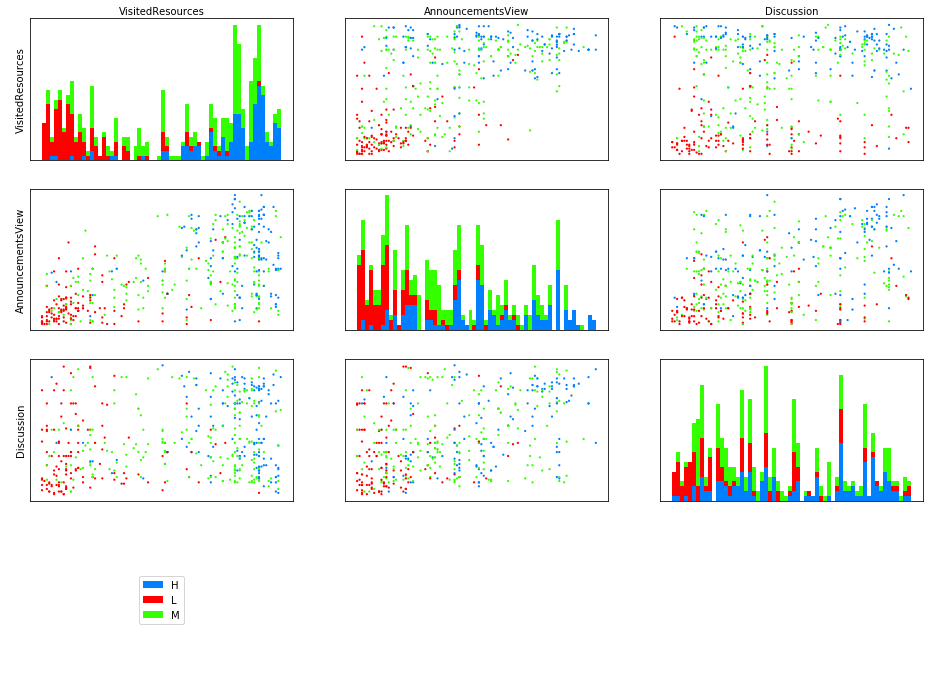

In [18]:
# Generate scatter plots of all pairs of features, coloring objects with their clas
cross_distributions_classification(X, Y, var_names=F.numeric, figsize=(16,12), bins=60)

#### What relatonships between features and Y can you see?

We see that
* VisitedResources and AnnouncementsView are positively correlated. This shows that people who visit resources also view announcements.
* class H tends to have the highest number of VisitedResources and vary in number of AnnouncementsView and Discussions
* class L has the lowest amount of VisitedResources, AnnouncementsView and Discussions
* class M has a diversity in the number of VisitedResources, AnnouncementsView, Discussions

#### Project the *numeric* features onto all principal components. 
* Don't forget to normalize data passed to PCA with sklearn.preprocessing.StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_normalized = StandardScaler().fit_transform(X)
y = Y

n_components = 3
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X_normalized)

In [20]:
principalDf = pd.DataFrame(data = principalComponents
      , columns = ['principal component ' + str(x+1) for x in range(n_components)])

In [21]:
finalDf = pd.concat([principalDf, pd.DataFrame(Y, columns=['target'])], axis = 1)

In [22]:
finalDf[:5]

,principal component 1,principal component 2,principal component 3,target
0,-0.252687,1.008967,0.392749,M
1,-2.191308,0.110183,-0.209968,L
2,-0.107973,-1.234104,-0.469550,L
3,0.161449,-1.750405,0.260763,M
4,1.045269,-0.663875,-1.236434,H


### Visualize 3D

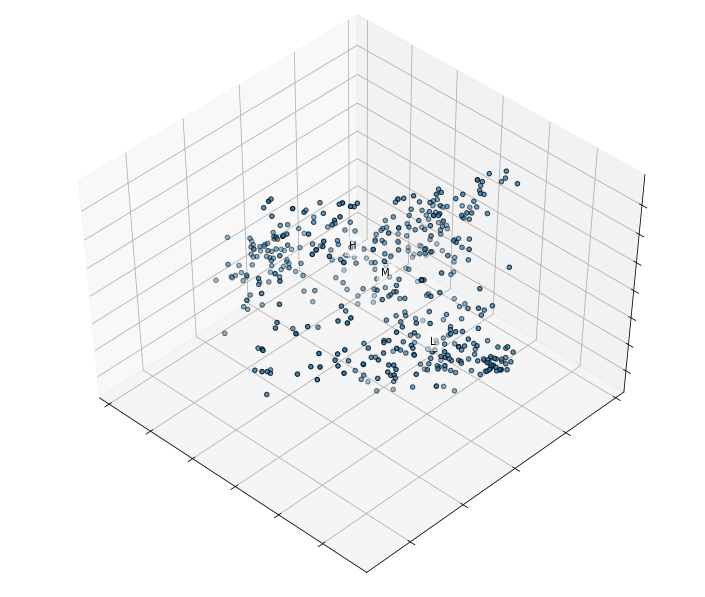

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name in classes:
    ax.text3D(principalComponents[y == name, 0].mean(),
              principalComponents[y == name, 1].mean(),
              principalComponents[y == name, 2].mean(),
              name,
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], cmap=plt.cm.rainbow, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()


#### Plot projections on first 2 principal components. Show Y values with color. Can classes be easily separated in this 2D space?

### Visualize 2D

In [24]:
def plot_projection_on_2_principal_components(name1='principal component 1', name2='principal component 2'):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(name1, fontsize = 15)
    ax.set_ylabel(name2, fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    colors = ['r', 'g', 'b']
    for target, color in zip(classes,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, name1]
                   , finalDf.loc[indicesToKeep, name2]
                   , c = color
                   , s = 50)
    ax.legend(classes)
    ax.grid()

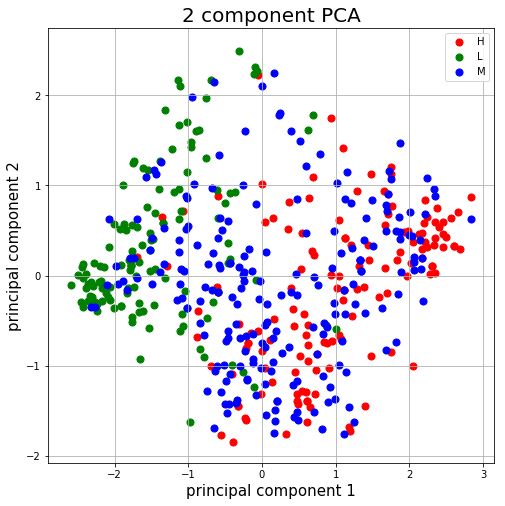

In [25]:
plot_projection_on_2_principal_components()

Classes cannot be easily separated in this 2D space

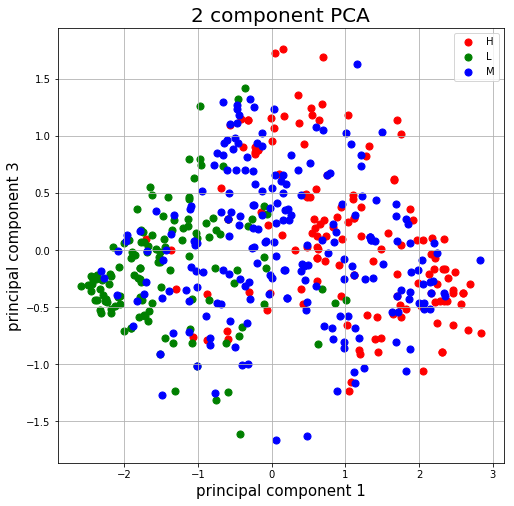

In [26]:
plot_projection_on_2_principal_components('principal component 1', 'principal component 3')

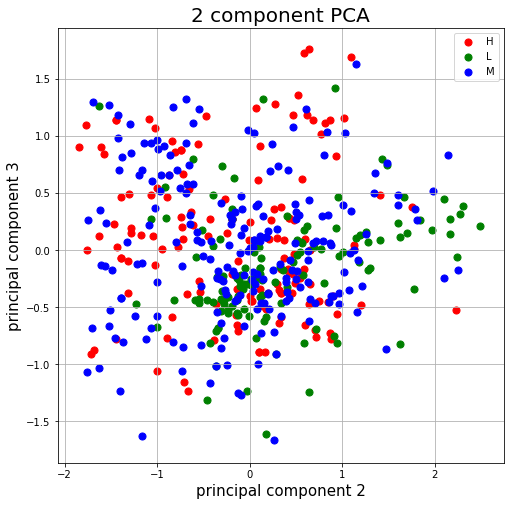

In [27]:
plot_projection_on_2_principal_components('principal component 2', 'principal component 3')

Classes cannot be easily separated in all these 2D space

#### Plot explained variance ratio by each of existing principal components

In [28]:
# calculate variance ratios
ratios = pca.explained_variance_ratio_
print(ratios)  

[0.617784 0.25827  0.123946]


In [29]:
# cumulative sum of variance explained with [n] features
var = np.cumsum(np.round(ratios, decimals=3)*100)
print(var)

[ 61.8  87.6 100. ]


In the above array we see that the first feature explains roughly 61.8% of the variance within our data set while the first two explain 87.6%

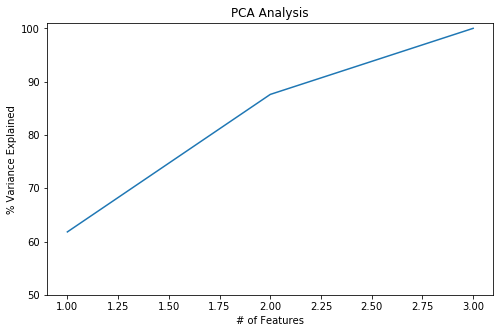

In [30]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(50,101)
plt.plot(range(1,n_components+1), var)

#### Get best cross-validation score by varying n_neighbors=[1,3,5,7,11, 16, 25, 51]
* Use sklearn.model_selection.GridSearchCV to find the classifier clf with best parameters 
* Print clf.best\_score_, clf.best\_params_

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [32]:
n_range = [1,3,5,7,11, 16, 25, 51]
param_grid = dict(n_neighbors=n_range)
knn = KNeighborsClassifier()

In [33]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)

In [34]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 11, 16, 25, 51]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [35]:
print('Best score:', grid.best_score_)
print('Best params:', grid.best_params_)

Best score: 0.6166666666666667
Best params: {'n_neighbors': 16}


In [36]:
print('Mean score:')
for i in range(len(n_range)):
    print("%0.3f (+/-%0.3f) for %r" %
          (grid.cv_results_['mean_test_score'][i],
           grid.cv_results_['std_test_score'][i], 
           grid.cv_results_['params'][i]))

Mean score:
0.600 (+/-0.059) for {'n_neighbors': 1}
0.585 (+/-0.052) for {'n_neighbors': 3}
0.594 (+/-0.049) for {'n_neighbors': 5}
0.598 (+/-0.082) for {'n_neighbors': 7}
0.610 (+/-0.055) for {'n_neighbors': 11}
0.617 (+/-0.068) for {'n_neighbors': 16}
0.615 (+/-0.076) for {'n_neighbors': 25}
0.600 (+/-0.069) for {'n_neighbors': 51}


Text(0,0.5,'Cross-Validated Accuracy')

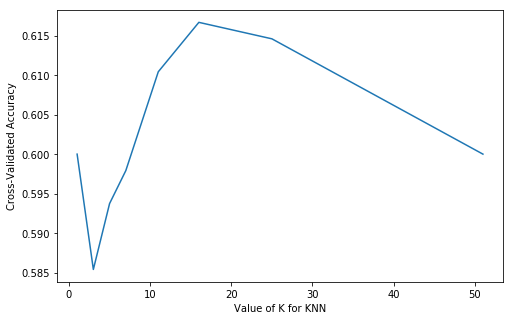

In [37]:
plt.plot(n_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Calculate standard deviations of numeric features. Do they have equal spread?

In [38]:
for i in range(len(F.numeric)):
    print("Mean: %0.3f  Std: %0.3f for %r" % (np.mean(X[:,i]), np.std(X[:,i]), F.numeric[i]))

Mean: 54.798  Std: 33.046 for 'VisitedResources'
Mean: 37.919  Std: 26.584 for 'AnnouncementsView'
Mean: 43.283  Std: 27.609 for 'Discussion'


They have equal spread

#### Normalize numeric features with sklearn.preprocessing.StandardScaler

#### For NORMALIZED numeic features get best cross-validation score by varying n_neighbors=[1,3,5,7,11, 16, 25, 51]
* Use sklearn.model_selection.GridSearchCV to find the classifier clf with best parameters 
* Print clf.best\_score_ clf.best\_params_

Best score: 0.6145833333333334
Best params: {'n_neighbors': 11}
Mean score:
0.613 (+/-0.049) for {'n_neighbors': 1}
0.590 (+/-0.070) for {'n_neighbors': 3}
0.598 (+/-0.074) for {'n_neighbors': 5}
0.608 (+/-0.079) for {'n_neighbors': 7}
0.615 (+/-0.059) for {'n_neighbors': 11}
0.604 (+/-0.057) for {'n_neighbors': 16}
0.606 (+/-0.064) for {'n_neighbors': 25}
0.594 (+/-0.064) for {'n_neighbors': 51}


Text(0,0.5,'Cross-Validated Accuracy')

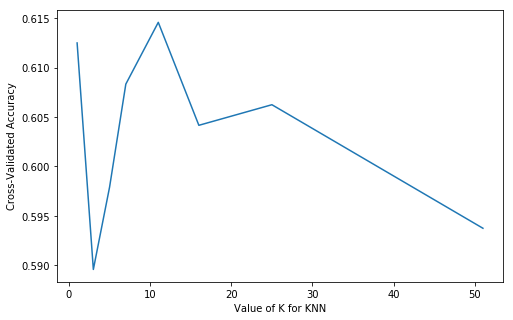

In [39]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid.fit(X_normalized, y)
print('Best score:', grid.best_score_)
print('Best params:', grid.best_params_)
print('Mean score:')
for i in range(len(n_range)):
    print("%0.3f (+/-%0.3f) for %r" %
          (grid.cv_results_['mean_test_score'][i],
           grid.cv_results_['std_test_score'][i], 
           grid.cv_results_['params'][i]))
    
plt.plot(n_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Try optimizing weights in ['uniform','distance']

In [40]:
param_grid['weights'] = ['uniform','distance']

#### NonNormalized

Best score: 0.6479166666666667
Best params: {'n_neighbors': 16, 'weights': 'distance'}
Mean score:
0.600 (+/-0.059) for {'n_neighbors': 1, 'weights': 'uniform'}
0.600 (+/-0.059) for {'n_neighbors': 1, 'weights': 'distance'}
0.585 (+/-0.052) for {'n_neighbors': 3, 'weights': 'uniform'}
0.600 (+/-0.060) for {'n_neighbors': 3, 'weights': 'distance'}
0.594 (+/-0.049) for {'n_neighbors': 5, 'weights': 'uniform'}
0.610 (+/-0.061) for {'n_neighbors': 5, 'weights': 'distance'}
0.598 (+/-0.082) for {'n_neighbors': 7, 'weights': 'uniform'}
0.608 (+/-0.069) for {'n_neighbors': 7, 'weights': 'distance'}
0.610 (+/-0.055) for {'n_neighbors': 11, 'weights': 'uniform'}
0.640 (+/-0.058) for {'n_neighbors': 11, 'weights': 'distance'}
0.617 (+/-0.068) for {'n_neighbors': 16, 'weights': 'uniform'}
0.648 (+/-0.041) for {'n_neighbors': 16, 'weights': 'distance'}
0.615 (+/-0.076) for {'n_neighbors': 25, 'weights': 'uniform'}
0.635 (+/-0.061) for {'n_neighbors': 25, 'weights': 'distance'}
0.600 (+/-0.069) for

Text(0,0.5,'Cross-Validated Accuracy')

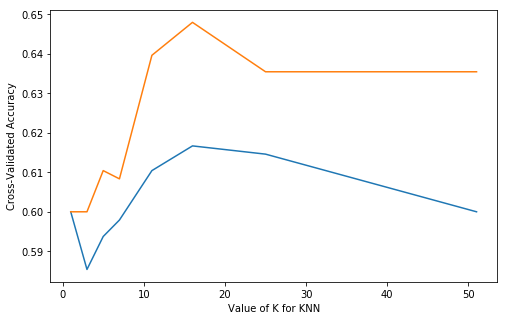

In [41]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid.fit(X, y)
print('Best score:', grid.best_score_)
print('Best params:', grid.best_params_)

uniform = grid.cv_results_['mean_test_score'][0::2]
distance = grid.cv_results_['mean_test_score'][1::2]
print('Mean score:')
for i in range(len(grid.cv_results_['mean_test_score'])):
    print("%0.3f (+/-%0.3f) for %r" %
          (grid.cv_results_['mean_test_score'][i],
           grid.cv_results_['std_test_score'][i], 
           grid.cv_results_['params'][i]))
    
plt.plot(n_range, uniform, label='uniform')
plt.plot(n_range, distance, label='distance')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Normalized

Best score: 0.6395833333333333
Best params: {'n_neighbors': 51, 'weights': 'distance'}
Mean score:
0.613 (+/-0.049) for {'n_neighbors': 1, 'weights': 'uniform'}
0.613 (+/-0.049) for {'n_neighbors': 1, 'weights': 'distance'}
0.590 (+/-0.070) for {'n_neighbors': 3, 'weights': 'uniform'}
0.613 (+/-0.059) for {'n_neighbors': 3, 'weights': 'distance'}
0.598 (+/-0.074) for {'n_neighbors': 5, 'weights': 'uniform'}
0.613 (+/-0.082) for {'n_neighbors': 5, 'weights': 'distance'}
0.608 (+/-0.079) for {'n_neighbors': 7, 'weights': 'uniform'}
0.615 (+/-0.066) for {'n_neighbors': 7, 'weights': 'distance'}
0.615 (+/-0.059) for {'n_neighbors': 11, 'weights': 'uniform'}
0.629 (+/-0.060) for {'n_neighbors': 11, 'weights': 'distance'}
0.604 (+/-0.057) for {'n_neighbors': 16, 'weights': 'uniform'}
0.627 (+/-0.046) for {'n_neighbors': 16, 'weights': 'distance'}
0.606 (+/-0.064) for {'n_neighbors': 25, 'weights': 'uniform'}
0.631 (+/-0.063) for {'n_neighbors': 25, 'weights': 'distance'}
0.594 (+/-0.064) for

Text(0,0.5,'Cross-Validated Accuracy')

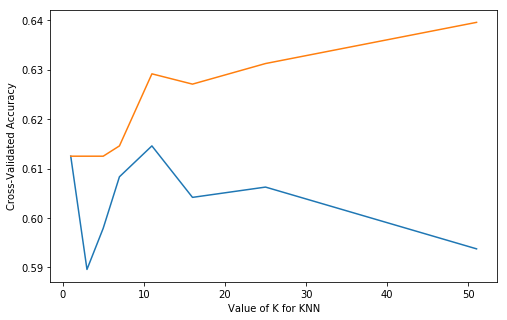

In [42]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid.fit(X_normalized, y)
print('Best score:', grid.best_score_)
print('Best params:', grid.best_params_)

uniform = grid.cv_results_['mean_test_score'][0::2]
distance = grid.cv_results_['mean_test_score'][1::2]
print('Mean score:')
for i in range(len(grid.cv_results_['mean_test_score'])):
    print("%0.3f (+/-%0.3f) for %r" %
          (grid.cv_results_['mean_test_score'][i],
           grid.cv_results_['std_test_score'][i], 
           grid.cv_results_['params'][i]))
    
plt.plot(n_range, uniform, label='uniform')
plt.plot(n_range, distance, label='distance')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Report overall best model cross-validation score and best model parameters for numeric features

Best score: 0.6479166666666667

Best params: {'n_neighbors': 16, 'weights': 'distance'}

For numeric features for non-normalized sample

# Adding categorical features

#### Calculate *sklearn.metrics.normalized_mutual_info_score* to find 3 categorical variables mostly connected with output. 

#### What are those features? Explain.

#### Add one-hot-encoded categorical features to Z

In [43]:
from common.feature_transformations import get_one_hot_encoding

In [44]:
F.categorical_one_hot = []
for col in F.categorical:
    print('Making one-hot-encoding of %s'%col)
    feature_one_hot = get_one_hot_encoding(Z[col])
    Z = pd.concat([Z, feature_one_hot],axis=1)
    F.categorical_one_hot += list(feature_one_hot.columns)

Making one-hot-encoding of Gender
Making one-hot-encoding of Nationality
Making one-hot-encoding of PlaceofBirth
Making one-hot-encoding of StageID
Making one-hot-encoding of GradeID
Making one-hot-encoding of SectionID
Making one-hot-encoding of Topic
Making one-hot-encoding of Semester
Making one-hot-encoding of Relation
Making one-hot-encoding of ParentAnsweringSurvey
Making one-hot-encoding of ParentSchoolSatisfaction
Making one-hot-encoding of StudentAbsenceDays


In [45]:
Z.head()

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,...,Semester=F,Semester=S,Relation=Father,Relation=Mum,ParentAnsweringSurvey=No,ParentAnsweringSurvey=Yes,ParentSchoolSatisfaction=Bad,ParentSchoolSatisfaction=Good,StudentAbsenceDays=Above-7,StudentAbsenceDays=Under-7
0,F,KW,KuwaIT,MiddleSchool,G-06,A,IT,F,Father,30,...,1,0,1,0,0,1,0,1,0,1
1,M,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,0,...,1,0,1,0,0,1,1,0,0,1
2,M,Tunis,Tunis,MiddleSchool,G-07,A,Quran,S,Father,19,...,0,1,1,0,1,0,1,0,1,0
3,M,Egypt,Egypt,lowerlevel,G-04,A,Math,S,Mum,49,...,0,1,0,1,1,0,1,0,1,0
4,M,KW,KuwaIT,lowerlevel,G-02,B,French,S,Father,40,...,0,1,1,0,0,1,0,1,0,1


In [46]:
Z.columns

Index(['Gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'RaisedHands',
       'VisitedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentSchoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Gender=F', 'Gender=M',
       'Nationality=Egypt', 'Nationality=Iran', 'Nationality=Iraq',
       'Nationality=Jordan', 'Nationality=KW', 'Nationality=Lybia',
       'Nationality=Morocco', 'Nationality=Palestine',
       'Nationality=SaudiArabia', 'Nationality=Syria', 'Nationality=Tunis',
       'Nationality=USA', 'Nationality=lebanon', 'Nationality=venzuela',
       'PlaceofBirth=Egypt', 'PlaceofBirth=Iran', 'PlaceofBirth=Iraq',
       'PlaceofBirth=Jordan', 'PlaceofBirth=KuwaIT', 'PlaceofBirth=Lybia',
       'PlaceofBirth=Morocco', 'PlaceofBirth=Palestine',
       'PlaceofBirth=SaudiArabia', 'PlaceofBirth=Syria', 'PlaceofBirth=Tunis',
       'PlaceofBirth=USA', 'PlaceofBirth=lebanon', 'Plac

#### Add one most significant categorical feature (in one-hot-encoded representation) to X 
* don't forget to standardize numeric features to zero mean, unit variance

#### Make optimization over n_neighbors, weights, p. Did the quality improve?

#### Add 2 more most significant categorical features (in one-hot-encoded representation) to X 


#### Specify your own distance function to K-NN, calculating $L_1$ normed distance. Numeric features there should be added with weights 1 and one-hot encoded features should be added with custom constant weight w.

#### Finetune K-NN with your custom distance function by it's major parameters and w optimization. Report CV accuracy and best parameters.